In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Predict shirt sizes by height and weight

In [96]:
df = pd.read_csv("tshirt_sizes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
Height    49 non-null int64
Weight    49 non-null int64
Size      49 non-null object
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [97]:
shirt_color = {"S": "c", "M": "g", "L": "r"}

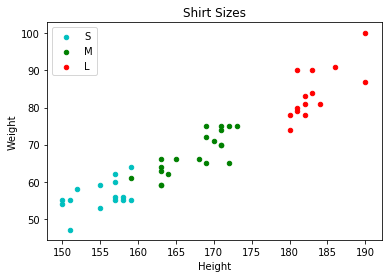

In [98]:
fig, ax = plt.subplots()
for size in ["S", "M", "L"]:
    color = shirt_color[size]
    df[df.Size == size].plot(kind="scatter",
                            x="Height",
                            y="Weight",
                            label=size,
                            ax=ax,
                            color=color,title="Shirt Sizes")

### Observation: As weight and height increase, shirt size increase

In [100]:
km = KMeans(3, init="k-means++", random_state=3)
km.fit(df[["Height", "Weight"]])
df["Size_Predict"] = km.predict(df[["Height", "Weight"]])
df.groupby(["Size", "Size_Predict"])
cross = pd.crosstab(df.Size,
           df.Size_Predict,
           rownames=["Size"],
           colnames=["Size_Predict"])
cross

Size_Predict,0,1,2
Size,,,
L,13,0,1
M,0,6,14
S,0,15,0


In [101]:
shirt_bin_map = {0: "L", 1: "S", 2: "M"}

In [102]:
df["Size_Predict"] = df["Size_Predict"].map(shirt_bin_map)

### Predicting shirt sizes by height and weight

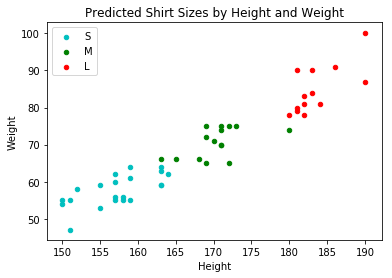

In [103]:
fig, ax = plt.subplots()
for size in ["S", "M", "L"]:
    color = shirt_color[size]
    df[df.Size_Predict == size].plot(kind="scatter",
                            x="Height",
                            y="Weight",
                            label=size,
                            ax=ax,
                            color=color,
                            title="Predicted Shirt Sizes by Height and Weight")